## Data Inspection

### Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Load

In [3]:
#fMRI_data
fMRI_func_data_sub01_event = pd.read_csv("./data/sub-001/func/sub-001_task-CognitiveControl_run-01_events.tsv" , sep='\t')
fMRI_func_data_sub01_event_df = pd.DataFrame(fMRI_func_data_sub01_event)
fMRI_func_data_sub01_event_df.head(5)

,onset,duration,trial_type,stimulus,accuracy,response_time
0,8.5,1,ICS,BlueLeft,1,0.553
1,14.0,1,ICNS,BlueLeft,1,0.497
2,18.5,1,ICNS,BlueRight,1,0.636
3,23.0,1,CS,RedRight,1,0.582
4,27.5,1,CNS,RedLeft,1,0.521


In [4]:
participants_data = pd.read_csv("./data/participants.tsv" , sep='\t')
participants_data_df = pd.DataFrame(participants_data)
participants_data_df.iloc[:, 0: 16].head(5) # excluding the colums related to self-reported score


,participant_id,age,sex,task_order,task_rule,raven_score,AoA,CET_4_score,RT_L1S,RT_L1NS,RT_L2S,RT_L2NS,ER_L1S,ER_L1NS,ER_L2S,ER_L2NS
0,sub-001,20,F,Lan,Red,56,12,455,1068,948,1059,1027,0.000,0.000,0.050,0.050
1,sub-002,24,F,Lan,Red,55,13,576,918,832,897,823,0.025,0.000,0.025,0.025
2,sub-003,24,M,Lan,Red,60,7,543,951,859,883,841,0.000,0.000,0.000,0.000
3,sub-004,21,F,Lan,Red,47,8,564,1101,1023,1000,935,0.050,0.075,0.050,0.025
4,sub-005,24,M,Lan,Blue,59,13,539,891,766,760,784,0.025,0.025,0.025,0.000


In [5]:
null_counts = participants_data_df.isnull().sum()
print(null_counts)

participant_id       0
age                  0
sex                  0
task_order           0
task_rule            0
raven_score          0
AoA                  0
CET_4_score          0
RT_L1S               0
RT_L1NS              0
RT_L2S               0
RT_L2NS              0
ER_L1S               0
ER_L1NS              0
ER_L2S               0
ER_L2NS              0
Chinese_reading      0
Chinese_writing      0
Chinese_speaking     0
Chinese_listening    0
English_reading      0
English_writing      0
English_speaking     0
English_listening    0
dtype: int64


In [6]:
participants_data_df.columns

Index(['participant_id', 'age', 'sex', 'task_order', 'task_rule',
       'raven_score', 'AoA', 'CET_4_score', 'RT_L1S', 'RT_L1NS', 'RT_L2S',
       'RT_L2NS', 'ER_L1S', 'ER_L1NS', 'ER_L2S', 'ER_L2NS', 'Chinese_reading',
       'Chinese_writing', 'Chinese_speaking', 'Chinese_listening',
       'English_reading', 'English_writing', 'English_speaking',
       'English_listening'],
      dtype='object')

### Language related data

In [7]:
print(participants_data_df["raven_score"].value_counts())
print(participants_data_df["CET_4_score"].value_counts())

raven_score
60    13
58    13
57    13
56     8
59     8
53     5
51     4
55     3
54     3
47     2
52     2
44     2
50     1
Name: count, dtype: int64
CET_4_score
496    3
550    2
534    2
556    2
495    2
      ..
587    1
475    1
450    1
511    1
445    1
Name: count, Length: 63, dtype: int64


In [16]:
#AoA and raven score, CET 4 score 

test_and_AoA = participants_data_df[["participant_id", "AoA","raven_score","CET_4_score"]]
test_and_AoA = test_and_AoA.sort_values(by='AoA')

x_participant = test_and_AoA["participant_id"].to_list()
y_AoA = test_and_AoA["AoA"].to_list()
y_raven = test_and_AoA["raven_score"].to_list()
y_raven = [float(i)/2 for i in y_raven]
y_CET = test_and_AoA["CET_4_score"].to_list()
y_CET = [float(i)/22 for i in y_CET]

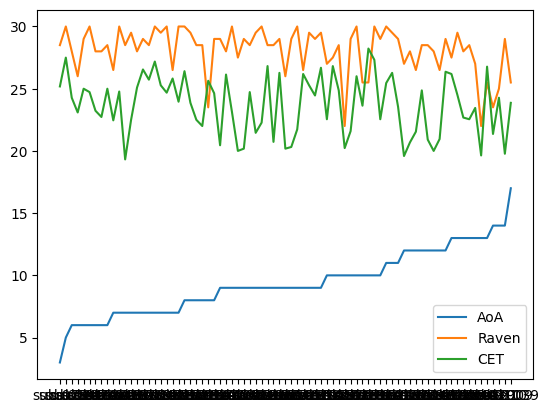

In [17]:
plt.plot(x_participant, y_AoA , label='AoA')
plt.plot(x_participant, y_raven, label='Raven')
plt.plot(x_participant, y_CET, label='CET')

plt.legend()
plt.show()

### Data Info


#### Participants

participant_id : participant identifier

age : Age in years as in the initial session

sex : Self-rated by participant, M for male/F for female

task_order : Lan means participants did the language control task first; Con means participants did the cognitive control task first

task_rule : Red means the red color corresponds to 'naming in L1' in the language control task and 'pressing the same direction' in the cognitive control task; Blue means the blue color corresponds to 'naming in L1' in the language control task and 'pressing the same direction' in the cognitive control task

raven_score : The score of Raven test, full score = 60

AoA : Age of Acquirement, the age to start learning English

CET_4_score : The score of College English Test Band 4, full score = 710

RT_L1S : The reaction time (ms) for L1S condition (first language, switch) of the language control task which re-collected in the behavioral laboratory

RT_L1NS : The reaction time (ms) for L1NS condition (first language, non-switch) of the language control task which re-collected in the behavioral laboratory

RT_L2S : The reaction time (ms) for L2S condition (second language, switch) of the language control task which re-collected in the behavioral laboratory

RT_L2NS : The reaction time (ms) for L2NS condition (second language, non-switch) of the language control task which re-collected in the behavioral laboratory

ER_L1S : The error rate for L1S condition (first language, switch) of the language control task which re-collected in the behavioral laboratory

ER_L1NS : The error rate for L1NS condition (first language, non-switch) of the language control task which re-collected in the behavioral laboratory

ER_L2S : The error rate for L2S condition (second language, switch) of the language control task which re-collected in the behavioral laboratory

ER_L2NS : The error rate for L2NS condition (second language, non-switch) of the language control task which re-collected in the behavioral laboratory

Chinese/English reading, writing, speaking, listening : The self-rating scores for Language on a 10-point scale

#### Cog Control
{
  
  "AcquisitionMatrixPE": 64,

  "AcquisitionNumber": 1,

  "BandwidthPerPixelPhaseEncode": 33.967,

  "BaseResolution": 64,
  
  "CogAtlasID": "http://www.cognitiveatlas.org/task/id/TODO",

  "CoilCombinationMethod": "Sum of Squares",

  "CoilString": "C:HEA;HEP",

  "ConversionSoftware": "dcm2niix",

  "ConversionSoftwareVersion": "v1.0.20220720",

  "DerivedVendorReportedEchoSpacing": 0.000460005,

  "DeviceSerialNumber": "35193",

  "DwellTime": 3.1e-06,

  "EchoTime": 0.03,

  "EffectiveEchoSpacing": 0.000460005,

  "FlipAngle": 90,

  "HeudiconvVersion": "1.1.6",
  
  "ImageType": [
    "ORIGINAL",
    "PRIMARY",
    "M",
    "ND",
    "MOSAIC"
],

  "ImagingFrequency": 123.254,

  "InPlanePhaseEncodingDirectionDICOM": "COL",

  "InstitutionAddress": "Xinjiekouwai Street No 19,Beijing,Haidian District,CN,100875",

  "InstitutionalDepartmentName": "Department",

  "MRAcquisitionType": "2D",

  "MagneticFieldStrength": 3,

  "Manufacturer": "Siemens",

  "ManufacturersModelName": "TrioTim",

  "MatrixCoilMode": "SENSE",

  "Modality": "MR",

  "NonlinearGradientCorrection": false,

  "PartialFourier": 1,

  "PatientPosition": "HFS",

  "PercentPhaseFOV": 100,

  "PercentSampling": 100,

  "PhaseEncodingDirection": "j-",

  "PhaseEncodingSteps": 64,

  "PhaseResolution": 1,

  "PixelBandwidth": 2520,

  "ProtocolName": "ge_func_3x3x4_164",

  "PulseSequenceDetails": "%SiemensSeq%\\ep2d_bold",

  "ReceiveCoilName": "HeadMatrix",

  "ReconMatrixPE": 64,

  "RepetitionTime": 2,

  "ScanOptions": "FS",

  "ScanningSequence": "EP",

  "SequenceName": "*epfid2d1_64",

  "SequenceVariant": "SK",

  "SeriesDescription": "ge_func_3x3x4_164",

  "SliceThickness": 4,

  "SoftwareVersions": "syngo MR B17",

  "SpacingBetweenSlices": 4.6,

  "StationName": "MRC35193",

  "TaskName": "CognitiveControl",

  "TotalReadoutTime": 0.0289803,

  "dcmmeta_reorient_transform": [

    [0.0, -1.0, 0.0, 63.0],
    [1.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 1.0]
],

  "dcmmeta_shape": [64, 64, 33, 164],

  "dcmmeta_slice_dim": 2,

  "dcmmeta_version": 0.6}


#### Lang Control
{

  "AcquisitionMatrixPE": 64,

  "AcquisitionNumber": 1,

  "BandwidthPerPixelPhaseEncode": 33.967,

  "BaseResolution": 64,

  "CogAtlasID": "http://www.cognitiveatlas.org/task/id/TODO",

  "CoilCombinationMethod": "Sum of Squares",

  "CoilString": "C:HEA;HEP",

  "ConversionSoftware": "dcm2niix",

  "ConversionSoftwareVersion": "v1.0.20220720",

  "DerivedVendorReportedEchoSpacing": 0.000460005,

  "DeviceSerialNumber": "35193",

  "DwellTime": 3.1e-06,

  "EchoTime": 0.03,

  "EffectiveEchoSpacing": 0.000460005,

  "FlipAngle": 90,

  "HeudiconvVersion": "1.1.6",

  "ImageType": [
    "ORIGINAL",
    "PRIMARY",
    "M",
    "ND",
    "MOSAIC"
],

  "ImagingFrequency": 123.254,

  "InPlanePhaseEncodingDirectionDICOM": "COL",

  "InstitutionAddress": "Xinjiekouwai Street No 19,Beijing,Haidian District,CN,100875",

  "InstitutionalDepartmentName": "Department",

  "MRAcquisitionType": "2D",

  "MagneticFieldStrength": 3,

  "Manufacturer": "Siemens",

  "ManufacturersModelName": "TrioTim",

  "MatrixCoilMode": "SENSE",

  "Modality": "MR",

  "NonlinearGradientCorrection": false,

  "PartialFourier": 1,

  "PatientPosition": "HFS",

  "PercentPhaseFOV": 100,

  "PercentSampling": 100,

  "PhaseEncodingDirection": "j-",

  "PhaseEncodingSteps": 64,

  "PhaseResolution": 1,

  "PixelBandwidth": 2520,

  "ProtocolName": "ge_func_3x3x4_164",

  "PulseSequenceDetails": "%SiemensSeq%\\ep2d_bold",

  "ReceiveCoilName": "HeadMatrix",

  "ReconMatrixPE": 64,

  "RepetitionTime": 2,

  "ScanOptions": "FS",

  "ScanningSequence": "EP",

  "SequenceName": "*epfid2d1_64",

  "SequenceVariant": "SK",

  "SeriesDescription": "ge_func_3x3x4_164",

  "SliceThickness": 4,

  "SoftwareVersions": "syngo MR B17",

  "SpacingBetweenSlices": 4.6,

  "StationName": "MRC35193",

  "TaskName": "LanguageControl",

  "TotalReadoutTime": 0.0289803,

  "dcmmeta_reorient_transform": [
    [0.0, -1.0, 0.0, 63.0],
    [1.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 1.0]
],

  "dcmmeta_shape": [64, 64, 33, 164],

  "dcmmeta_slice_dim": 2,

  "dcmmeta_version": 0.6}


#### Scans

filename : Name of the nifti file

acq_time : Acquisition time of the particular scan, destroyed for anonymisation in this dataset

operator : Name of the operator

randstr : md5 hash of UIDs (randomly generated string)